In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from scipy.integrate import simps
from scipy.optimize import curve_fit


Bad key text.latex.preview in file /home/pedroc/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /home/pedroc/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /home/pedroc/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default qualit

In [34]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [20]:
data = np.loadtxt('Data/Supernova_density_profile.txt', delimiter = ',')
data2 = np.loadtxt('Data/Supernova_density_profile_2.txt')

In [13]:
def inverse(x, A, n):
    return A/x**n

In [41]:
def rho_res(delta_m, E, Y_e, cos2theta):
    # delta_m is Δm² in eV
    # E is given in MeV
    # Y_e is the electron fraction
    rho = 1.4e6*(delta_m/1)*(10/E)*(0.5/Y_e)*cos2theta
    return rho

In [44]:
theta_13 = 8.878*np.pi/180
c_13 = np.cos(2*theta_13)

theta_12 = 33.447*np.pi/180
c_12 = np.cos(2*theta_12)
rho_res(7.53e-5, 10, 0.5, c_12)

41.370333027013835

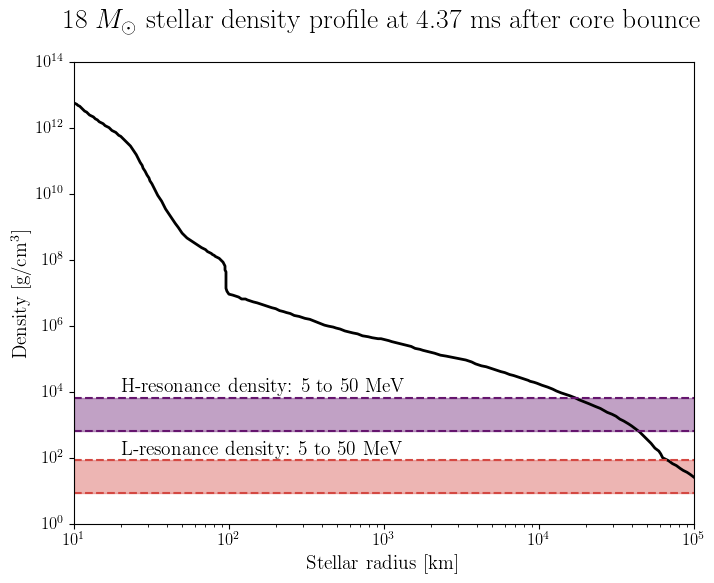

In [68]:
omega_h = 8e-5/(2*10e6)
omega_h_km = omega_h/(0.197e9*1e-15/1000)
omega_l = 2.5e-3/(2*10e6)
omega_l_km = omega_l/(0.197e9*1e-15/1000)

fig, ax = plt.subplots(figsize=(8,6))
plt.plot(data[:,0], data[:,1]*1e3, lw = 2, color = 'black')
# plt.plot(data2[:,0], data2[:,1])
# plt.plot(data[:,0], inverse(data[:,0], 1e12, 3))
plt.axhline(rho_res(2.44e-3, 5, 0.5, c_13), ls = '--', color = sns.color_palette('inferno')[1])
plt.axhline(rho_res(2.44e-3, 50, 0.5, c_13), ls = '--', color = sns.color_palette('inferno')[1])
plt.fill_between([1e1,1e5], rho_res(2.44e-3, 50, 0.5, c_13), rho_res(2.44e-3, 5, 0.5, c_13),
                 color = sns.color_palette('inferno')[1], alpha = 0.4)
plt.text(2e1, 1e4, 'H-resonance density: 5 to 50 MeV', fontsize = 14)
plt.axhline(rho_res(7.53e-5, 5, 0.5, c_12), ls = '--', color = sns.color_palette('inferno')[3])
plt.axhline(rho_res(7.53e-5, 50, 0.5, c_12), ls = '--', color = sns.color_palette('inferno')[3])
plt.fill_between([1e1,1e5], rho_res(7.53e-5, 50, 0.5, c_12), rho_res(7.53e-5, 5, 0.5, c_12),
                 color = sns.color_palette('inferno')[3], alpha = 0.4)
plt.text(2e1, 1.3e2, 'L-resonance density: 5 to 50 MeV', fontsize = 14)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Stellar radius [km]', fontsize = 14)
plt.ylabel('Density [g/cm$^3$]', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlim(10, 1e5)
plt.ylim(1e0, 1e14)
plt.title(r'18 $M_\odot$ stellar density profile at 4.37 ms after core bounce', fontsize = 20,
         pad = 24)
plt.show()